# Import Modules and Data
ref: https://www.nltk.org/book/

https://www.jianshu.com/p/0e1d51a7549d

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/PY/NLTK

/content/drive/My Drive/PY/NLTK


In [ ]:
# input your own Google drive path to find the file
df_hc = pd.read_excel('EFSA_Approved_Health_Claims.xlsx', header=None)
df_hc.columns = ['hc']
df_hc['hc'] = [e.replace('</p>','') for e in df_hc['hc']]
df_hc.head()

,hc
0,ALA contributes to the maintenance of normal b...
1,Activated charcoal contributes to reducing exc...
2,Barley grain fibre contributes to an increase ...
3,Beta-glucans contribute to the maintenance of ...
4,Betaine contributes to normal homocysteine met...


In [ ]:
df_hc.hc[0]

'ALA contributes to the maintenance of normal blood cholesterol levels.'

# Tokenization

In [ ]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
word_tokens = word_tokenize(df_hc.hc[239])

print(sent_tokenize(df_hc.hc[239]))
print(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Replacing saturated fats with unsaturated fats in the diet has been shown to lower/reduce blood cholesterol.', 'High cholesterol is a risk factor in the development of coronary heart disease.']
['Replacing', 'saturated', 'fats', 'with', 'unsaturated', 'fats', 'in', 'the', 'diet', 'has', 'been', 'shown', 'to', 'lower/reduce', 'blood', 'cholesterol', '.', 'High', 'cholesterol', 'is', 'a', 'risk', 'factor', 'in', 'the', 'development', 'of', 'coronary', 'heart', 'disease', '.']


In [ ]:
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(df_hc.hc[239]))

['Replacing', 'saturated', 'fats', 'with', 'unsaturated', 'fats', 'in', 'the', 'diet', 'has', 'been', 'shown', 'to', 'lower/reduce', 'blood', 'cholesterol.', 'High', 'cholesterol', 'is', 'a', 'risk', 'factor', 'in', 'the', 'development', 'of', 'coronary', 'heart', 'disease', '.']


# Stop Word
deleting stop words like conjunction and preposition 

In [ ]:
# nltk.download('stopwords')
from nltk.corpus import stopwords  # Stopwords corpus
filtered_sent = [w for w in word_tokens if not w in stopwords.words('english')]
print(filtered_sent)

['ALA', 'contributes', 'maintenance', 'normal', 'blood', 'cholesterol', 'levels', '.']


# Stemming
Standardize words into a root format (might not be a real word), removing tenses and plural 's'

In [ ]:
from nltk.stem import PorterStemmer   
ps = PorterStemmer()
ps_stem_word = [ps.stem(word) for word in word_tokens]
print(ps_stem_word )

['ala', 'contribut', 'to', 'the', 'mainten', 'of', 'normal', 'blood', 'cholesterol', 'level', '.']


In [ ]:
from nltk.stem import SnowballStemmer   
snow = SnowballStemmer('english')
stem_words = [snow.stem(word) for word in word_tokens]
print(stem_words)

['ala', 'contribut', 'to', 'the', 'mainten', 'of', 'normal', 'blood', 'cholesterol', 'level', '.']


# POS tagging

In [ ]:
# nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(word_tokens)
print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('Replacing', 'VBG'), ('saturated', 'VBD'), ('fats', 'NNS'), ('with', 'IN'), ('unsaturated', 'JJ'), ('fats', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('diet', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('shown', 'VBN'), ('to', 'TO'), ('lower/reduce', 'VB'), ('blood', 'NN'), ('cholesterol', 'NN'), ('.', '.'), ('High', 'NNP'), ('cholesterol', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('risk', 'NN'), ('factor', 'NN'), ('in', 'IN'), ('the', 'DT'), ('development', 'NN'), ('of', 'IN'), ('coronary', 'JJ'), ('heart', 'NN'), ('disease', 'NN'), ('.', '.')]


In [ ]:
#create pos columns
df_hc['pos'] = [[i[1] for i in nltk.pos_tag(word_tokenize(s))] for s in df_hc.hc]

In [ ]:
def reduceSeq(l): # reduce repeated pos tags
    record = [x+1 for x,y in enumerate(l[1:]) if y == l[x]]
    l = l[:] #shallow copy
    for i in record[::-1]:
        l.pop(i)
        l[i-1] += '*'
    return l
df_hc['pos_reduced'] = list(map(reduceSeq, df_hc.pos))

In [ ]:
df_hc.head()

,hc,pos,pos_reduced
0,ALA contributes to the maintenance of normal b...,"[NNP, VBZ, TO, DT, NN, IN, JJ, NN, NN, NNS, .]","[NNP, VBZ, TO, DT, NN, IN, JJ, NN*, NNS, .]"
1,Activated charcoal contributes to reducing exc...,"[VBN, NN, NNS, TO, VBG, JJ, NN, IN, VBG, .]","[VBN, NN, NNS, TO, VBG, JJ, NN, IN, VBG, .]"
2,Barley grain fibre contributes to an increase ...,"[NNP, NN, NN, VBZ, TO, DT, NN, IN, JJ, NN, .]","[NNP, NN*, VBZ, TO, DT, NN, IN, JJ, NN, .]"
3,Beta-glucans contribute to the maintenance of ...,"[NNS, NN, TO, DT, NN, IN, JJ, NN, NN, NNS, .]","[NNS, NN, TO, DT, NN, IN, JJ, NN*, NNS, .]"
4,Betaine contributes to normal homocysteine met...,"[NNP, VBZ, TO, JJ, JJ, NN, .]","[NNP, VBZ, TO, JJ*, NN, .]"


In [ ]:
# mining frequent POS tag sequence
def buildEdges(l, k=2, minS=10, raw=False):  
# l为输入的序列集合， k是序列中行为的个数 默认为2，minS是最小支持度 默认为10, 若raw为真返回原始全部dict数据
  edges = {}
  for s in l:
    s=s[:]
    s.insert(0,'s') # start notation
    for i in range(len(s)):
      if i+ k <= len(s):
        edge = '-'.join(s[i:i+k]) 
        if edge in edges:
          edges[edge] += 1
        else:
          edges[edge] = 1
  
  df_edges = pd.DataFrame(edges,index=['Support']).T.sort_values(by=['Support'],ascending=False)
  stat = {'TotalCombinations':len(df_edges),'min':df_edges['Support'].min(),
          'median':df_edges['Support'].median(),'mean':df_edges['Support'].mean(),
          'max':df_edges['Support'].max()
         }
  return df_edges[df_edges['Support']>minS],pd.DataFrame([stat]) if raw==False else edges
# 输出为tuple, [0]项为dataframe结果，[1]为全部组合的统计数据

In [ ]:
buildEdges(df_hc.pos, 2, 50)[0]

,Support
NN-IN,273
JJ-NN,244
DT-NN,202
NN-.,192
VBZ-TO,174
s-NNP,168
NNP-VBZ,136
NN-NN,135
TO-DT,124
IN-JJ,124


In [ ]:
buildEdges(df_hc.pos, 3, 50)[0]

,Support
DT-NN-IN,141
NNP-VBZ-TO,124
TO-DT-NN,100
NN-IN-JJ,97
JJ-NN-.,96
VBZ-TO-DT,87
s-NNP-VBZ,83
NN-IN-DT,83
IN-JJ-NN,83
VBZ-TO-JJ,80


In [ ]:
buildEdges(df_hc.pos, 4, 50)[0]

,Support
TO-DT-NN-IN,100
DT-NN-IN-JJ,79
s-NNP-VBZ-TO,77
VBZ-TO-DT-NN,71
NN-IN-JJ-NN,64
NNP-VBZ-TO-DT,62
NN-IN-DT-NN,61
NNP-VBZ-TO-JJ,59
s-NNP-NNP-VBZ,52


In [ ]:
buildEdges(df_hc.pos, 5, 50)[0]

,Support
VBZ-TO-DT-NN-IN,71
TO-DT-NN-IN-JJ,65
DT-NN-IN-JJ-NN,55
NNP-VBZ-TO-DT-NN,51


In [ ]:
buildEdges(df_hc.pos, 6, 30)[0]

,Support
NNP-VBZ-TO-DT-NN-IN,51
VBZ-TO-DT-NN-IN-JJ,48
TO-DT-NN-IN-JJ-NN,44
s-NNP-VBZ-TO-DT-NN,37
VBZ-TO-JJ-JJ-NN-.,37
NNP-VBZ-TO-JJ-JJ-NN,31


In [ ]:
buildEdges(df_hc.pos, 7, 30)[0]

,Support
s-NNP-VBZ-TO-DT-NN-IN,37
NNP-VBZ-TO-DT-NN-IN-JJ,36


In [ ]:
buildEdges(df_hc.pos, 8, 20)[0]

,Support
s-NNP-VBZ-TO-DT-NN-IN-JJ,28


In [ ]:
buildEdges(df_hc.pos, 9, 10)[0]

,Support
s-NNP-VBZ-TO-DT-NN-IN-JJ-NN,16
TO-DT-NN-IN-JJ-NN-NN-NNS-.,15
NNP-VBZ-TO-DT-NN-IN-JJ-NN-.,13
VBZ-TO-JJ-NN-IN-DT-JJ-NN-.,11


In [ ]:
buildEdges(df_hc.pos, 10, 9)[0]

,Support
s-NNP-VBZ-TO-DT-NN-IN-JJ-NN-.,10


# Chunking
by set Regular expression

In [ ]:
# test on health claims
tagged = nltk.pos_tag(nltk.word_tokenize(df_hc.hc[239]))
tagged

[('Replacing', 'VBG'),
 ('saturated', 'VBD'),
 ('fats', 'NNS'),
 ('with', 'IN'),
 ('unsaturated', 'JJ'),
 ('fats', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('diet', 'NN'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('shown', 'VBN'),
 ('to', 'TO'),
 ('lower/reduce', 'VB'),
 ('blood', 'NN'),
 ('cholesterol', 'NN'),
 ('.', '.'),
 ('High', 'NNP'),
 ('cholesterol', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('risk', 'NN'),
 ('factor', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('development', 'NN'),
 ('of', 'IN'),
 ('coronary', 'JJ'),
 ('heart', 'NN'),
 ('disease', 'NN'),
 ('.', '.')]

In [ ]:
# chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
chunkGram = r"""Chunk: {<NNP>*<NN>*<NNS>?}"""
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged)
chunked.draw()     

In [ ]:
for subtree in chunked.subtrees():
    print(subtree)

(S
  Replacing/VBG
  saturated/VBD
  (Chunk fats/NNS)
  with/IN
  unsaturated/JJ
  (Chunk fats/NNS)
  in/IN
  the/DT
  (Chunk diet/NN)
  has/VBZ
  been/VBN
  shown/VBN
  to/TO
  lower/reduce/VB
  (Chunk blood/NN cholesterol/NN)
  ./.
  (Chunk High/NNP cholesterol/NN)
  is/VBZ
  a/DT
  (Chunk risk/NN factor/NN)
  in/IN
  the/DT
  (Chunk development/NN)
  of/IN
  coronary/JJ
  (Chunk heart/NN disease/NN)
  ./.)
(Chunk fats/NNS)
(Chunk fats/NNS)
(Chunk diet/NN)
(Chunk blood/NN cholesterol/NN)
(Chunk High/NNP cholesterol/NN)
(Chunk risk/NN factor/NN)
(Chunk development/NN)
(Chunk heart/NN disease/NN)


In [ ]:
# only show matched chunks
for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
    print(subtree)

(Chunk fats/NNS)
(Chunk fats/NNS)
(Chunk diet/NN)
(Chunk blood/NN cholesterol/NN)
(Chunk High/NNP cholesterol/NN)
(Chunk risk/NN factor/NN)
(Chunk development/NN)
(Chunk heart/NN disease/NN)


In [ ]:
# Chinking delete some word
chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""
#从缝隙中删除一个或多个动词，介词，限定词或to这个词。

In [ ]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}               # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}           # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)
chunked = cp.parse(tagged)
chunked.draw()

In [ ]:
for subtree in chunked.subtrees():
    print(subtree)

(S
  Replacing/VBG
  saturated/VBD
  (NP fats/NNS)
  (PP with/IN (NP unsaturated/JJ fats/NNS))
  (PP in/IN (NP the/DT diet/NN))
  has/VBZ
  been/VBN
  shown/VBN
  to/TO
  lower/reduce/VB
  (NP blood/NN cholesterol/NN)
  ./.
  (NP High/NNP cholesterol/NN)
  is/VBZ
  (NP a/DT risk/NN factor/NN)
  (PP in/IN (NP the/DT development/NN))
  (PP of/IN (NP coronary/JJ heart/NN disease/NN))
  ./.)
(NP fats/NNS)
(PP with/IN (NP unsaturated/JJ fats/NNS))
(NP unsaturated/JJ fats/NNS)
(PP in/IN (NP the/DT diet/NN))
(NP the/DT diet/NN)
(NP blood/NN cholesterol/NN)
(NP High/NNP cholesterol/NN)
(NP a/DT risk/NN factor/NN)
(PP in/IN (NP the/DT development/NN))
(NP the/DT development/NN)
(PP of/IN (NP coronary/JJ heart/NN disease/NN))
(NP coronary/JJ heart/NN disease/NN)


## Chunking example

In [ ]:
# nltk.download('conll2000')
from nltk.corpus import conll2000
print(conll2000.chunked_sents('train.txt')[99])

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\colla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.


(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [ ]:
print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


In [ ]:
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [ ]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [ ]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [ ]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [ ]:
postags = sorted(set(pos for sent in train_sents for (word,pos) in sent.leaves()))
print(unigram_chunker.tagger.tag(postags))

[('#', 'B-NP'), ('$', 'B-NP'), ("''", 'O'), ('(', 'O'), (')', 'O'), (',', 'O'), ('.', 'O'), (':', 'O'), ('CC', 'O'), ('CD', 'I-NP'), ('DT', 'B-NP'), ('EX', 'B-NP'), ('FW', 'I-NP'), ('IN', 'O'), ('JJ', 'I-NP'), ('JJR', 'B-NP'), ('JJS', 'I-NP'), ('MD', 'O'), ('NN', 'I-NP'), ('NNP', 'I-NP'), ('NNPS', 'I-NP'), ('NNS', 'I-NP'), ('PDT', 'B-NP'), ('POS', 'B-NP'), ('PRP', 'B-NP'), ('PRP$', 'B-NP'), ('RB', 'O'), ('RBR', 'O'), ('RBS', 'B-NP'), ('RP', 'O'), ('SYM', 'O'), ('TO', 'O'), ('UH', 'O'), ('VB', 'O'), ('VBD', 'O'), ('VBG', 'O'), ('VBN', 'O'), ('VBP', 'O'), ('VBZ', 'O'), ('WDT', 'B-NP'), ('WP', 'B-NP'), ('WP$', 'B-NP'), ('WRB', 'O'), ('``', 'O')]


# Named Entity Recognition

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
def process_content():
    try:
        for i in tokenized[:3]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
    except Exception as e:
        print(str(e))

process_content()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\colla\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\colla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [ ]:
tagged = nltk.pos_tag(nltk.word_tokenize(df_hc.hc[2]))
tagged

[('Barley', 'NNP'),
 ('grain', 'NN'),
 ('fibre', 'NN'),
 ('contributes', 'VBZ'),
 ('to', 'TO'),
 ('an', 'DT'),
 ('increase', 'NN'),
 ('in', 'IN'),
 ('faecal', 'JJ'),
 ('bulk', 'NN'),
 ('.', '.')]

In [ ]:
namedEnt = nltk.ne_chunk(tagged, binary=True)
namedEnt.draw()

# Lemmatizing
Stemmed word might not be a real word, lemmatizing would standardise the word.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# nltk.download('wordnet')

In [ ]:
lemmatizer = WordNetLemmatizer()
# transform to noun by default
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))
print(lemmatizer.lemmatize("running"))
print(lemmatizer.lemmatize("studied"))
print(lemmatizer.lemmatize("known","v"))
print(lemmatizer.lemmatize("actively"))

cat
cactus
goose
rock
python
good
best
run
run
running
studied
know
actively


In [ ]:
# Word net lemmatizer use a diffferent pos tag from penn-tree bank
def get_wordnet_pos(treebank_tag):
#     treebank_tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(treebank_tag[0], wordnet.NOUN)

lemmatized_word = [lemmatizer.lemmatize(i[0],get_wordnet_pos(i[1])) for i in tagged]
lemmatized_word

['Activated',
 'charcoal',
 'contributes',
 'to',
 'reduce',
 'excessive',
 'flatulence',
 'after',
 'eat',
 '.']

In [ ]:
tagged

[('Activated', 'VBN'),
 ('charcoal', 'NN'),
 ('contributes', 'NNS'),
 ('to', 'TO'),
 ('reducing', 'VBG'),
 ('excessive', 'JJ'),
 ('flatulence', 'NN'),
 ('after', 'IN'),
 ('eating', 'VBG'),
 ('.', '.')]

# Synonyms & antonyms

In [ ]:
syns = wordnet.synsets("program")
print(syns[0].name())

plan.n.01


In [ ]:
print(syns[0].lemmas()[0].name())


plan


In [ ]:
# defination
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [ ]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'unspoiled', 'upright', 'respectable', 'adept', 'ripe', 'goodness', 'honest', 'undecomposed', 'full', 'near', 'just', 'effective', 'honorable', 'skillful', 'dear', 'in_effect', 'expert', 'estimable', 'dependable', 'soundly', 'skilful', 'trade_good', 'in_force', 'practiced', 'good', 'well', 'unspoilt', 'secure', 'commodity', 'salutary', 'serious', 'beneficial', 'sound', 'safe', 'proficient', 'right', 'thoroughly'}
{'bad', 'evilness', 'evil', 'badness', 'ill'}


In [ ]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("bad"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'bad', 'tough', 'speculative', 'risky', 'uncollectible', 'unfit', 'spoiled', 'unsound', 'forged', 'spoilt', 'big', 'badness', 'badly', 'defective', 'high-risk', 'sorry', 'regretful'}
{'goodness', 'unregretful', 'good'}


# Semantic similarity between words

In [ ]:
wordnet.synsets("love")

[Synset('love.n.01'),
 Synset('love.n.02'),
 Synset('beloved.n.01'),
 Synset('love.n.04'),
 Synset('love.n.05'),
 Synset('sexual_love.n.02'),
 Synset('love.v.01'),
 Synset('love.v.02'),
 Synset('love.v.03'),
 Synset('sleep_together.v.01')]

In [ ]:
w3 = wordnet.synset('love.n.01')
w4 = wordnet.synset('love.n.04')
w3.definition(),w4.definition()

('a strong positive emotion of regard and affection',
 'a deep feeling of sexual desire and attraction')

In [ ]:
print(w3.wup_similarity(w4))

0.6666666666666666


# Text Features Exploration

In [ ]:
all_hc_words = []
for s in df_hc.hc:
    all_hc_words.extend(nltk.word_tokenize(s))
all_words = nltk.FreqDist(all_words)
len(all_hc_words),len(all_words)

(3120, 463)

In [ ]:
print(all_words.most_common(15))

[('.', 257), ('to', 238), ('of', 213), ('contributes', 209), ('the', 195), ('normal', 186), ('maintenance', 66), ('Vitamin', 52), ('in', 50), ('blood', 46), ('function', 46), ('and', 39), ('a', 36), ('metabolism', 33), ('cholesterol', 25)]


In [ ]:
np.mean([len(i) for i in df_hc.hc])

75.30268199233717

In [ ]:
all_words

FreqDist({'.': 257, 'to': 238, 'of': 213, 'contributes': 209, 'the': 195, 'normal': 186, 'maintenance': 66, 'Vitamin': 52, 'in': 50, 'blood': 46, ...})

In [ ]:
pd.DataFrame(all_words.most_common(15))

,0,1
0,.,257
1,to,238
2,of,213
3,contributes,209
4,the,195
5,normal,186
6,maintenance,66
7,Vitamin,52
8,in,50
9,blood,46


In [ ]:
# Create Text corpus
all_hc_text = nltk.Text([w.lower() for w in all_hc_words])

# Find similar words
all_hc_text.similar('vitamin')

folate magnesium iron zinc biotin iodine niacin thiamine calcium
chromium copper manganese potassium riboflavin selenium chitosan
choline induces dha glucomannan


In [ ]:
all_hc_text.similar('contributes')

contribute helps help


In [ ]:
#Return collocations derived from the text, ignoring stopwords.
all_hc_text.collocation_list(10, 2)

['risk factor',
 'energy-yielding metabolism',
 'blood cholesterol',
 'immune system',
 'nervous system',
 'glucose rise',
 'cholesterol levels',
 'oxidative stress',
 'sugar-free chewing',
 'chewing gum']

In [ ]:
#Find contexts where the specified words appear; list most frequent common contexts first.
all_hc_text.common_contexts(['contributes'], num=20)

ala_to charcoal_to fibre_to betaine_to biotin_to calcium_to
chitosan_to chloride_to choline_to chromium_to meal_to of_to copper_to
dha_to fluoride_to folate_to glucomannan_to diet_to gum_to
methylcellulose_to


In [ ]:
# list context of searched word
all_hc_text.concordance('contributes', width=50 , lines=20)

Displaying 20 of 209 matches:
ala contributes to the maintenance
activated charcoal contributes to reducing excess
barley grain fibre contributes to an increase in 
l levels . betaine contributes to normal homocyst
etabolism . biotin contributes to normal energy-y
etabolism . biotin contributes to normal function
us system . biotin contributes to normal macronut
etabolism . biotin contributes to normal psycholo
 function . biotin contributes to the maintenance
rmal hair . biotin contributes to the maintenance
membranes . biotin contributes to the maintenance
mal skin . calcium contributes to normal blood cl
clotting . calcium contributes to normal energy-y
tabolism . calcium contributes to normal muscle f
function . calcium contributes to normal neurotra
smission . calcium contributes to the normal func
unction . chitosan contributes to the maintenance
 levels . chloride contributes to normal digestio
 stomach . choline contributes to normal homocyst
tabolism . choline contributes to n

In [ ]:
all_hc_text.count('contributes')

209

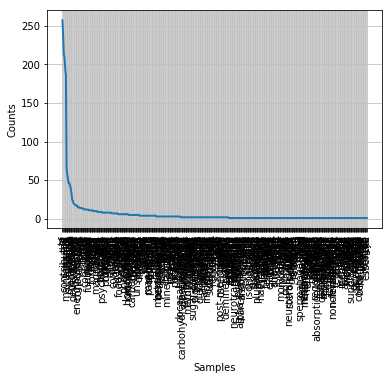

In [ ]:
all_hc_text.plot() # nltk.FreqDist(all_words).plot() # Word Frequency plot

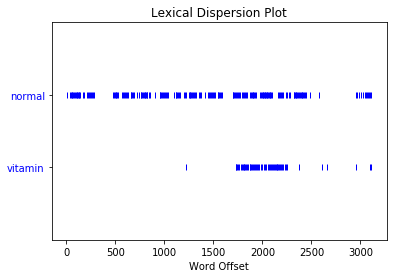

In [ ]:
all_hc_text.dispersion_plot(['normal','vitamin'])
#Produce a plot showing the distribution of the words through the text. Requires pylab to be installed.

In [ ]:
all_hc_text.vocab()

FreqDist({'.': 257, 'to': 238, 'of': 213, 'contributes': 209, 'the': 195, 'normal': 186, 'maintenance': 66, 'vitamin': 57, 'in': 51, 'blood': 46, ...})

In [ ]:
all_hc_text.findall("<normal>(<.*>)") # find all function

blood; blood; homocysteine; energy-yielding; functioning;
macronutrient; psychological; hair; mucous; skin; blood; energy-
yielding; muscle; neurotransmission; function; bones; teeth; brain;
blood; digestion; homocysteine; lipid; liver; macronutrient; blood;
connective; energy-yielding; functioning; hair; iron; skin; function;
blood; blood; brain; blood; vision; bowel; function; amino; blood;
homocysteine; psychological; function; blood; blood; blood; cognitive;
energy-yielding; functioning; skin; production; thyroid; cognitive;
energy-yielding; formation; oxygen; function; blood; energy-yielding;
functioning; muscle; protein; psychological; bones; teeth; energy-
yielding; bones; formation; sulphur; blood; energy-yielding;
functioning; psychological; mucous; skin; energy-yielding; mental;
synthesis; blood; energy-yielding; function; bones; teeth; blood;
functioning; muscle; blood; bones; blood; blood; blood; blood; energy-
yielding; functioning; mucous; red; skin; vision; metabolism; b

In [ ]:
all_hc_text.findall("<a.*>{2,}")

alpha-cyclodextrin as; arabinoxylan as; amino acid; an acceleration;
amino acid; and after; an acceleration; age and; acids are a; acids
are


In [ ]:
all_hc_text.index('contribute') # first appear index

33

In [ ]:
all_hc_words[33]

'contribute'